# MU4MA077, Base d'analyse de donnée, 2024-2025
# Analyse descriptive en Python

<div style="text-align: right"> 
Sorbonne Université, Master 1
</div>

<div style="text-align: right"> 
Merci à Catherine Matias, et aux autres collègues dont j'ai pu m'inspirer pour construire ce TP
</div>

# Table of contents
1. [Analyse Descriptive Univariée](#part1)
    - [Observation (et préparation) des données](#part1sec1)
    - [Fonction de répartition empirique](#part1sec2)
    - [Diagramme en batons et Pie chart](#part1sec3)
    - [Histogramme](#part1sec4)
    - [Indicateurs Statistiques](#part1sec5)
2. [Analyse multivariée](#part2)
    - [Normalisation](#part2sec1)
    - [Deux variables quantitatives](#part2sec2)
    - [Une variable quantitative et une qualitative](#part2sec3)
    - [Deux variables qualitatives](#part2sec4)
3. [Quelques exercices](#part3)
    - [Exercice 1](#part3sec1)
    - [Exercice 2](#part3sec2)
    - [Exercice 3](#part3sec3)


In [1]:
import numpy as np  # Vectors and matrices
import pandas as pd #Manipulation de données
import matplotlib.pyplot as plt  # Plots
# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

import seaborn as sns # Alternative Plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 

# Analyse Descriptive Univariée <a id="part1"></a>

Pour cette première partie, nous allons tenter de reproduire les exemples du cours en utilisant les jeux de données associées, c'est à dire: 

- Nombre mensuel de décès causés par des maladies pulmonaires entre 1974 et 1979 en Grande-Bretagne (nombre en millier).
- Nombre de grandes de découvertes scientifiques et inventions majeures entre 1860 et 1959.

Commençons par construire les jeux de données comme vus dans le cours. 

In [2]:
# Nombre mensuel de décès causés par des maladies pulmonaires entre 1974 et 1979 en Grande Bretagne (nombre en millier)
data1 = {
    'Year': [1974, 1975, 1976, 1977, 1978, 1979],
    'Jan': [3.04, 2.93, 2.79, 3.10, 2.82, 3.08],
    'Fév': [2.55, 2.89, 3.89, 2.29, 3.14, 2.60],
    'Mars': [2.70, 2.94, 3.18, 2.38, 2.68, 2.57],
    'Avril': [2.55, 2.50, 2.01, 2.44, 1.97, 2.14],
    'Mai': [2.01, 1.87, 1.64, 1.75, 1.87, 1.69],
    'Juin': [1.66, 1.73, 1.58, 1.55, 1.63, 1.50],
    'Jul': [1.72, 1.61, 1.49, 1.50, 1.53, 1.46],
    'Août': [1.52, 1.54, 1.30, 1.36, 1.37, 1.35],
    'Sep': [1.60, 1.40, 1.36, 1.35, 1.36, 1.33],
    'Oct': [2.07, 1.79, 1.65, 1.56, 1.57, 1.49],
    'Nov': [2.20, 2.08, 2.01, 1.64, 1.54, 1.78],
    'Déc': [2.51, 2.84, 2.82, 2.29, 2.49, 1.92]
}


#Nombre de grandes d´ecouvertes scientifiques et inventions majeures entre 1860 et 1959.
data2 = {
    'Year': [
        1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
        1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879,
        1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
        1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
        1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
        1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
        1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
        1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
        1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
        1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959
    ],
    'Discoveries': [
        5, 3, 0, 2, 0, 3, 2, 3, 6, 1,
        2, 1, 2, 1, 3, 3, 3, 5, 2, 4,
        4, 0, 2, 3, 7, 12, 3, 10, 9, 2,
        3, 7, 7, 2, 3, 3, 6, 2, 4, 3,
        5, 2, 2, 4, 0, 4, 2, 5, 2, 3,
        3, 6, 5, 8, 3, 6, 6, 0, 5, 2,
        2, 2, 6, 3, 4, 4, 2, 2, 4, 7,
        5, 3, 3, 0, 2, 2, 2, 1, 3, 4,
        2, 2, 1, 1, 1, 2, 1, 4, 4, 3,
        2, 1, 4, 1, 1, 1, 0, 0, 2, 0
    ]
}



## Observation (et préparation) des données <a id="part1sec1"></a>


<b style="color:red">À vous de jouer :</b> Dans un premier temps, commencez par transformer ces jeux de données au format ``DataFrame`` de ``pandas`` puis les imprimer à l'aide de la fonction ``print``. Pour simplifier l'execution de la suite du code, on appelera les DataFrames **df1** et **df2** respectivement. Qu'observe-t-on ? 

- Quel semble être le type des données (Qualitative? Quantitative? Discrete? Continue?) 
- Les données sont unidimensionnelles, semblent-elles etre présentées comme des matrices de taille $n \times 1$ avec $n$ indiquant le nombre de données?  

In [16]:
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

df1.head()

,Year,Jan,Fév,Mars,Avril,Mai,Juin,Jul,Août,Sep,Oct,Nov,Déc
0,1974,3.04,2.55,2.70,2.55,2.01,1.66,1.72,1.52,1.60,2.07,2.20,2.51
1,1975,2.93,2.89,2.94,2.50,1.87,1.73,1.61,1.54,1.40,1.79,2.08,2.84
2,1976,2.79,3.89,3.18,2.01,1.64,1.58,1.49,1.30,1.36,1.65,2.01,2.82
3,1977,3.10,2.29,2.38,2.44,1.75,1.55,1.50,1.36,1.35,1.56,1.64,2.29
4,1978,2.82,3.14,2.68,1.97,1.87,1.63,1.53,1.37,1.36,1.57,1.54,2.49


<b style="color:red"> Réponse :</b>

-Les 2 sont quantitatives df1 continue et df2 discrètes.

-Tel quel, df1 est multidimensionnelle, mais peut etre mis dans un vecteur unidimensionel

Les df eux sont des matrices nx2 de par l'étiquette des variables

Pour pouvoir plus facilement étudier nos jeux de données, on va les transformer en des vecteurs (matrice à une colonne). Pour ce faire, on peut par exemple utiliser les méthodes suivantes:

- ``drop`` qui permet d'enlever des colonnes ou des lignes d'une DataFrame
- ``values`` qui extrait les valeurs d'une DataFrame sous forme de liste(s)
- ``flatten`` qui transforme des valeurs sous forme matricielle en vecteur 

In [17]:
# Simplification des DataFrames
valeurs1 = df1.drop(columns=['Year']).values.flatten()
valeurs2 = df2['Discoveries'].values

#Impression des DataFrames
print(valeurs1)
print(valeurs2)

[3.04 2.55 2.7  2.55 2.01 1.66 1.72 1.52 1.6  2.07 2.2  2.51 2.93 2.89
 2.94 2.5  1.87 1.73 1.61 1.54 1.4  1.79 2.08 2.84 2.79 3.89 3.18 2.01
 1.64 1.58 1.49 1.3  1.36 1.65 2.01 2.82 3.1  2.29 2.38 2.44 1.75 1.55
 1.5  1.36 1.35 1.56 1.64 2.29 2.82 3.14 2.68 1.97 1.87 1.63 1.53 1.37
 1.36 1.57 1.54 2.49 3.08 2.6  2.57 2.14 1.69 1.5  1.46 1.35 1.33 1.49
 1.78 1.92]
[ 5  3  0  2  0  3  2  3  6  1  2  1  2  1  3  3  3  5  2  4  4  0  2  3
  7 12  3 10  9  2  3  7  7  2  3  3  6  2  4  3  5  2  2  4  0  4  2  5
  2  3  3  6  5  8  3  6  6  0  5  2  2  2  6  3  4  4  2  2  4  7  5  3
  3  0  2  2  2  1  3  4  2  2  1  1  1  2  1  4  4  3  2  1  4  1  1  1
  0  0  2  0]


## Fonction de répartition empirique <a id="part1sec2"></a>

Pour rappel, la fonction de répartition $F_n$, associée à un jeu de données $(z_1, \cdots, z_n)^T$ est définie en tout point $z \in \mathbb{R}$ par
   $$ F_n(z):= \frac{1}{n} \sum_{i =1} ^{n} 1\hspace{-3pt}1\left\{ z_i \in \left]-\infty, z \right]\right\} =  \frac{ \# \left\{  i \in [n] \mid z_i \leq z \right\}}{n}. $$

<b style="color:red"> À vous de jouer :</b> Ecrivez une fonction nommée `Fdremp` qui prend en entrée un jeux de données unidimensionnel et qui trace la fonction de repartition empririque associée à ce jeu de données. Appliquer cette fonction à **valeurs1** et **valeurs2**. Que pouvons-nous en conclure sur la nature des données de chacune des bases de données ? Quelle est la prochaine étape de visualisation en fonction du type de données que nous avons repéré? 


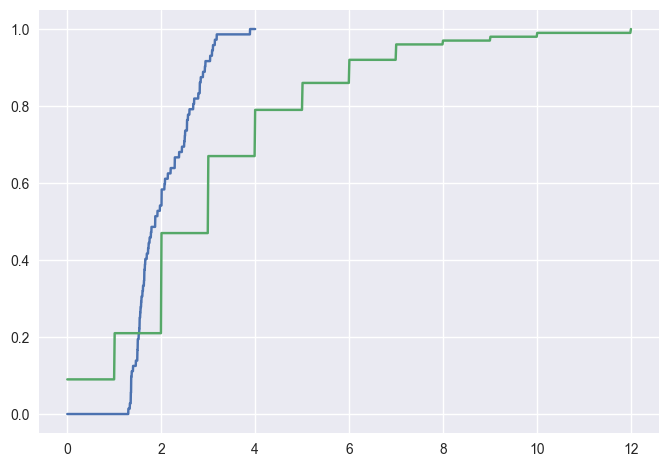

In [55]:
def Fdremp (data) :
    n = len(data)
    x = np.linspace(0,np.ceil(max(data)),1000)
    y = np.array([np.sum(data <= xi) for xi in x]) / n
    plt.plot(x,y)

Fdremp(valeurs1)
Fdremp(valeurs2)

<b style="color:red"> Réponse :</b>
Valeurs1 est continue

Valeurs2 est discret


## Diagramme en batons et Pie chart <a id="part1sec3"></a>

Rappelons que si l'on note $W := \{ w_k , k\in [m] \}$ l'ensemble des valeurs (ou modalités) observées dans le jeu de données de nature discrète (avec $m \leq n$), on peut définir la fréquence d'apparition de chaque modalité $w_k$ par $$ \hat{p}_k := \frac{1}{n} \sum_{i=1}^n 1\hspace{-3pt}1 \left\{z_i = w_k\right\} = \frac{\# \{ i \in [n] \mid z_i =k \}}{n}. $$ 

De plus avec cette fréquence d'apparition on peut construire deux représentations graphiques distinctes: 

- Le pie chart qui représente ces proportions en diagramme circulaire.
- Le diagramme en bâton qui les représente en barres.

<b style="color:red"> À vous de jouer :</b> À quel type de jeu de données ces représentations sont-elles le plus adaptées? Continues ou discrètes? En utilisant le jeu de donnée qui vous semble correspondre le mieux entre **data1** et **data2**, tracez un pie chart et un diagramme en bâton. Pour ce faire, vous pourrez utiliser les fonctions natives de ``matplotlib`` comme ``pie``ou ``bar``. Que pouvons-nous conclure? 

Attention, il vous faudra calculer vous-même les fréquences par modalités. 

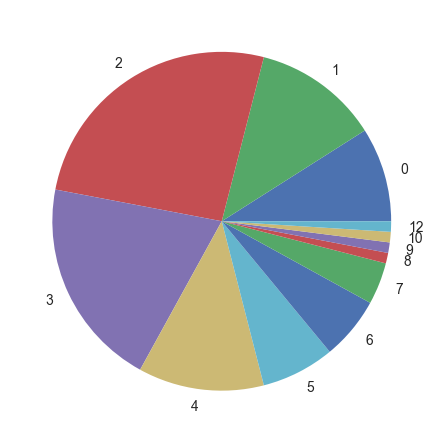

<BarContainer object of 12 artists>

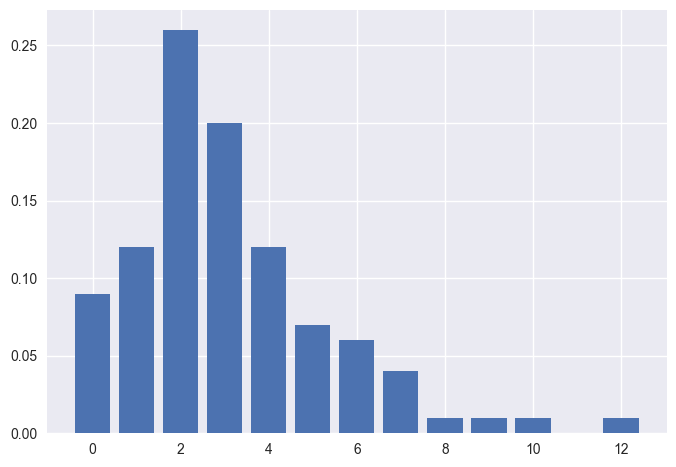

In [73]:
modalites = np.unique(valeurs2)
n2 = len(valeurs2)
frequences = [np.sum(valeurs2  == wk)/n2 for wk in modalites]
plt.pie(frequences, labels = modalites)
plt.show()
plt.bar(modalites,frequences)

<b style="color:red"> Réponse :</b> 



## Histogramme <a id="part1sec4"></a>

L'équivalent de ce type de représentations pour les données quantitatives continue, est l'histogramme. La définition d'un histogramme dépend d'une partition en intervalles de l'espace, i.e., d'un ensemble d'intervalles $A_1, \dots, A_m$ tel que

- Pour tout $j \in [m]$, $A_j$ est un intervalle de taille $\text{Diam}\left( A_j \right)$
-  $\bigcup\limits_{j \in [m]} A_j = \left[ z_{(1)},~ z_{(n)} \right]$ avec  $A_i \cap A_j = \emptyset$ pour tout $i \neq j$

On peut ensuite définir l'histogramme comme ceci. Soit $A_1, \dots, A_m$ une partition de $\left[ z_{(1)},~z_{(n)} \right]$, l'histogramme associé à cette partition est la fonction constante par morceaux définie pour tout $z \in \mathbb{R}$ par     $$ \hat{f}^{H}(z) := \frac{1}{n} \sum_{j =1}^m  \frac{\sum_{i=1}^{n} 1\hspace{-3pt}1\left\{z_i \in A_j \right\}}{\text{Diam}\left(A_j\right)} 1\hspace{-3pt}1\left\{ z \in A_j \right\} = \frac{1}{n} \sum_{j =1}^m  \frac{ \# \{ i \mid z_i \in A_j\}}{\text{Diam}\left(A_j\right)} 1\hspace{-3pt}1\left\{z \in A_j \right\}. 
$$

<b style="color:red"> À vous de jouer :</b>  En utilisant cette formule, écrivez une fonction qui prend en entrée un jeu de données unidimensionnel et qui trace l'histogramme correspondant à ce jeu de donnée. Appliquez cette fonction au jeu de donnée parmi **data1** et **data2** qui vous semble le plus adapté. Comparer votre résultat avec une méthode existante pour calculer un histogramme. Par exemple la fonction ``histplot`` du package ``seaborn``.

bins =15
largeur bins = 0.19999999999999996

x = [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
[0.         0.625      0.97222222 0.83333333 0.27777778 0.48611111
 0.20833333 0.55555556 0.20833333 0.41666667 0.34722222 0.
 0.         0.         0.06944444]


<Axes: ylabel='Density'>

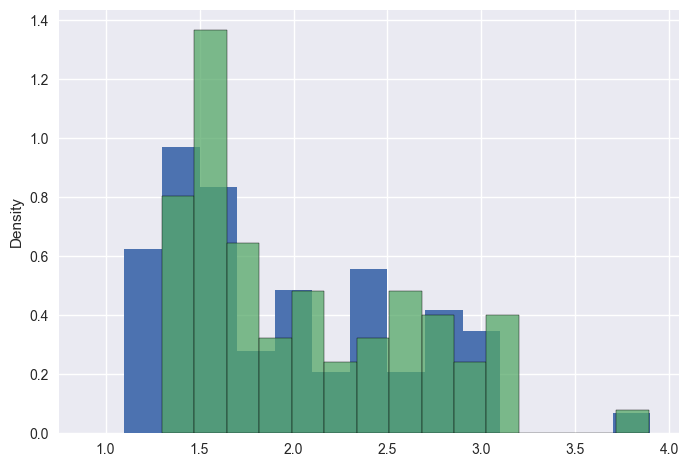

In [121]:
def histo_perso(data, bins=15):
    debut_inter = np.floor(data.min())
    fin_inter = np.ceil(data.max())
    x = np.linspace(debut_inter, fin_inter,bins+1)
    largeur_bins = np.diff(x)
    print(f"bins ={bins}")
    print(f"largeur bins = {largeur_bins[1]}")
    y = np.zeros(bins)
    for value in data :
        for j in range(bins) :
            count = 0
            if (x[j] < value <= x[j+1]) :
                y[j] += 1
    y = y / (len(data)*largeur_bins)
    plt.bar(x[:-1],y, width=largeur_bins)        




    print(f"\nx = {x}")
    
    print(y)

histo_perso(valeurs1)
sns.histplot(valeurs1, stat='density', bins = 15)

<b style="color:red"> Réponse (uniquement la seconde partie) :</b>



## Indicateurs Statistiques <a id="part1sec5"></a>

On va à présent étudier la tendance centrale et la dispersion des jeux de donnée à l'aide d'indicateurs statistiques. Nous allons également résumer les différents indicateurs dans une représentation graphique appelée une boite à moustache (ou boxplot). Pour commencer, rappelons que pour $\alpha \in (0,1)$, on définit le quantile empirique d'ordre $\alpha$ associé aux jeux de données $(z_1, \dots, z_n)^T$ par $$ q_n(\alpha) := F_n^{-1}(\alpha) = \inf\{ z \in \mathbb{R} \mid F_n(z) \geq \alpha \}. $$

<b style="color:red"> À vous de jouer :</b> 

- En utilisant la formule ci-dessus, écrire une fonction ``compute_quantile`` qui prend en entree un vecteur dans $\mathbb{R}^n$ et une valeur $\alpha$ et qui renvoi $F_n^{-1}(\alpha).$ pour vérifier votre fonction, simuler un vecteur aléatoire (par exemple gaussien ou uniforme) et comparer le résultat de votre fonction avec celui de la méthode ``quantile`` de ``numpy``.
- Pour les deux jeux de données que nous sommes en train de traiter, en utilisant les bon indicateurs statistiques et la fonction ``bxp`` de ``matplotlib``, tracer une boite à moustache simplifiée.

In [13]:

def compute_quantile(vecteur, alpha):
    n = len(vecteur)
    vecteur= np.sort(vecteur)
    quantile = int(np.ceil(alpha * n)) - 1
    return vecteur[quantile]

#Test
vecteur_test = np.random.normal(loc=0, scale=1, size=1000)  # Loi normale centrée réduite
alpha_values = [0.1, 0.25, 0.5, 0.75, 0.9]

results = {
    "Alpha": [],
    "Quantile (fonction perso)": [],
    "Quantile (numpy)": []
}

for alpha in alpha_values:
    q_custom = compute_quantile(vecteur_test, alpha)
    q_numpy = np.quantile(vecteur_test, alpha)
    
    results["Alpha"].append(alpha)
    results["Quantile (fonction perso)"].append(q_custom)
    results["Quantile (numpy)"].append(q_numpy)

    df_results = pd.DataFrame(results)
print(df_results)


   Alpha  Quantile (fonction perso)  Quantile (numpy)
0   0.10                  -1.281634         -1.273690
1   0.25                  -0.705046         -0.701343
2   0.50                  -0.008651         -0.008246
3   0.75                   0.654485          0.654960
4   0.90                   1.235526          1.237582


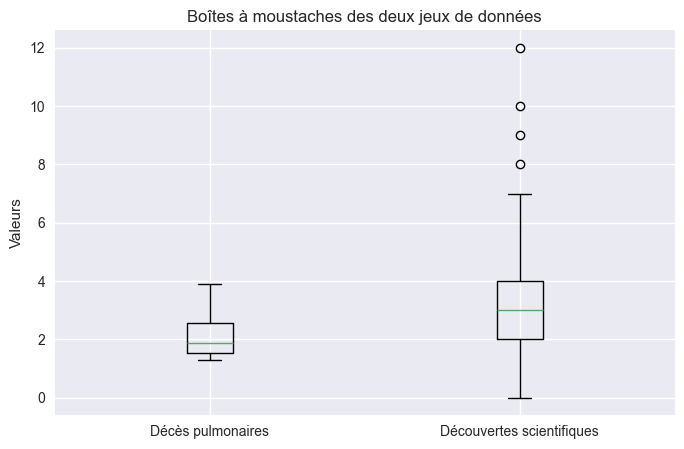

In [18]:
plt.figure(figsize=(8, 5))
plt.boxplot([valeurs1, valeurs2], labels=["Décès pulmonaires", "Découvertes scientifiques"])
plt.title("Boîtes à moustaches des deux jeux de données")
plt.ylabel("Valeurs")
plt.show()

Comparez avec ce que vous obtenez en utilisant les fonctions ``boxplot`` et eventuellement ``violinplot``de ``seaborn``, ci dessous.

C:\Users\tapri\AppData\Local\Temp\ipykernel_736\2002075377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(valeurs1, palette="Pastel1", ax=axes[0, 0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_736\2002075377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(valeurs2, palette="Pastel1", ax=axes[0, 1])
C:\Users\tapri\AppData\Local\Temp\ipykernel_736\2002075377.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(valeurs1, palette="Pastel1", ax=axes[1, 0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_736\2002075377.py:11: FutureWar

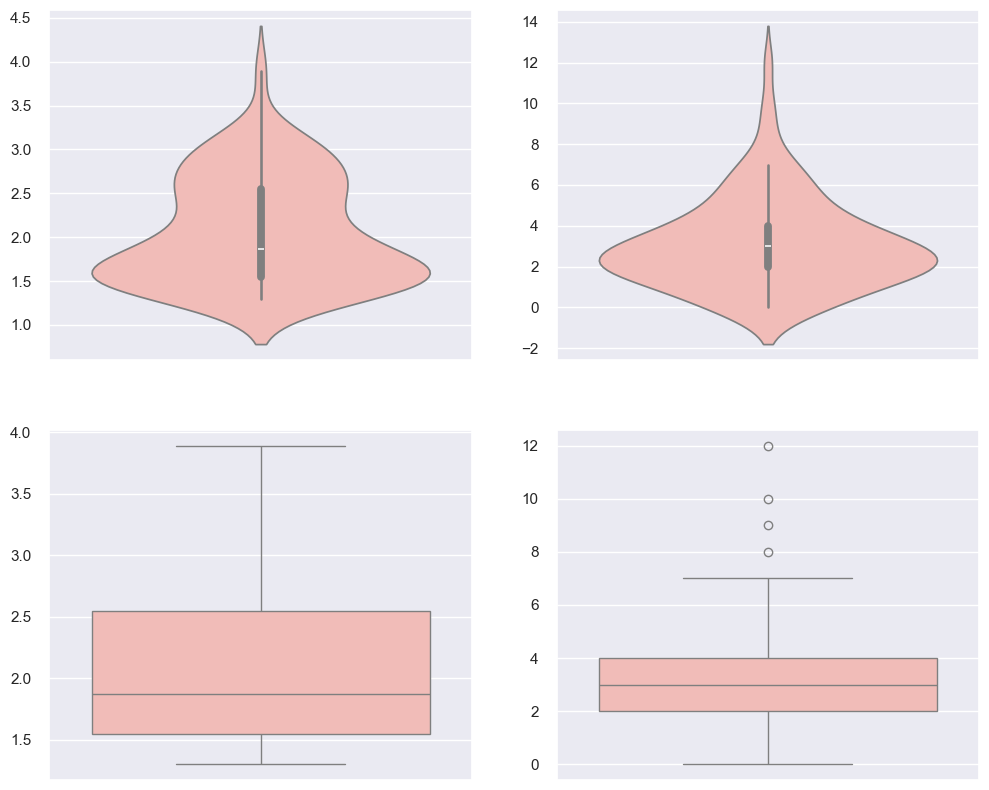

NameError: name 'draw_boxplot' is not defined

In [19]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
 
# Violinplots
sns.violinplot(valeurs1, palette="Pastel1", ax=axes[0, 0])
sns.violinplot(valeurs2, palette="Pastel1", ax=axes[0, 1])

#Boxplots
sns.boxplot(valeurs1, palette="Pastel1", ax=axes[1, 0])
sns.boxplot(valeurs2, palette="Pastel1", ax=axes[1, 1])

plt.show()

draw_boxplot(valeurs1, 1.5)
draw_boxplot(valeurs2, 1.5)

# Analyse multivariée <a id="part2"></a>

Dans cette seconde partie, on va essayer d'étudier des jeux de données qui ont plusieurs variables en même temps. Qu'est la première chose à faire si l'on souhaite comparer plusieurs variables quantitatives?

## Normalisation <a id="part2sec1"></a>

Pour rappel, nous avons vu en cours 3 types de normalisation de données. Soit $\left( z_1, \dots, z_n\right)$ un jeu de données avec $n$ observations unidimensionnels. 

- **Standardisation:** On transforme les éléments du jeu de données ainsi: $$ z_i^{(std)} := \frac{z_i - \bar{z}}{s_{n}},~~ \forall i \in [n]. $$
- **Min-Max Scaling:** Soit $a, b \in \mathbb{R}$ avec $ a\leq b$, on transforme les données ainsi:    $$ z_i^{(min/max)} :=  a+ \frac{(z_i - \min_{i \in [n]} z_i) (b-a)}{\min_{i \in [n]} z_i - \max_{i \in [n]} z_i},~~ \forall i \in [n]. $$    

- **Robust Scaling:** On  transforme les éléments du jeu de données ainsi: $$ z_i^{(rob)} := \frac{ z_i - q_n(1/2) }{eiq_n},~~ \forall i \in [n]. $$

Pour normaliser un jeu de données multidimensionnel, il suffit de normaliser une à une chaque composante unidimensionnelle. Pour pouvoir mieux observer l'impact de la normalisation des données, nous allons créer un jeu de donnée volontairement artificiel et étrangement distribué. 

In [48]:
# Setting a random seed for reproducibility
np.random.seed(42)

A = np.random.normal(loc=0, scale=1, size=100) # Normally distributed data
B = A**2 +10 # quadratic link with A
C = np.random.exponential(scale=2, size=100)  # Exponentially distributed data
D = np.concatenate( (np.random.normal(loc=0, scale=100, size=80), np.random.exponential(scale=1, size=20)) ) # Data with outliers

# Generate example data
data = pd.DataFrame({'A': A, 'B': B, 'C':  C, 'D': D})
data.head()

,A,B,C,D
0,0.496714,10.246725,1.080547,1.300189
1,-0.138264,10.019117,0.502335,145.353408
2,0.647689,10.419500,0.255361,-26.465683
3,1.523030,12.319620,0.823817,272.016917
4,-0.234153,10.054828,5.726242,62.566735


Si on essaye de faire un violon plot sur les données que nous venons de générer, voici ce que nous obtenons. Commentez. 

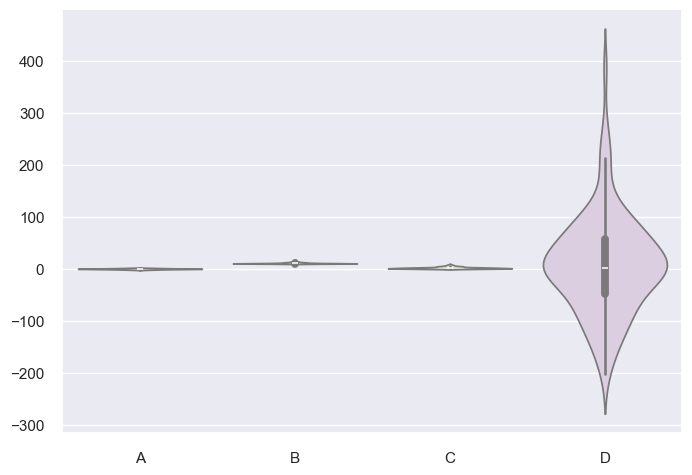

In [24]:
sns.violinplot(data, palette="Pastel1")
#sns.pairplot(data)
plt.show()

Nous observons que A est une distribution N(0,1) classique

B est très centré >10

C est une expo(2) classique

D en revanche est bien plus éclatée, avec de gros outlliers

<b style="color:red"> À vous de jouer :</b>  Implémentez 3 fonctions, une pour chaque type de normalisation. Appliquez ces différentes normalisations sur le jeu de données que nous venons de simuler à l'aide du module `sklearn.preprocessing` de python et réessayez de faire la visualisation précédente. 

In [50]:
#réponse 1
def standardisation (df):
    std_data = pd.DataFrame()
    for variable in df.columns :
        std_variable = (df[variable] - df[variable].mean() )/ df[variable].std()
        std_data[variable] = std_variable
    
    return std_data
        
standardise_data = standardisation(data)


In [52]:
def min_max_scaling (df, a, b) :
    m_m_s_data = pd.DataFrame()
    for variable in df.columns :
        m_m_s_variable = a + (df[variable] - df[variable].min()) * (b-a) / (df[variable].min() - df[variable].max())
        m_m_s_data [variable] = m_m_s_variable
    
    return m_m_s_data

min_max_data = min_max_scaling(data, 0 , 1)

In [ ]:
def robust_scaling (df) :
    robust_data = pd.DataFrame()
    for variable in df.columns :
        median = np.median(df[variable])  # q_n(1/2) = médiane
        iqr = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)
        robust_variable = (df[variable] - median) / iqr
        robust_data[variable] = robust_variable
    
    return robust_data

robust_data = robust_scaling(data)

<Axes: >

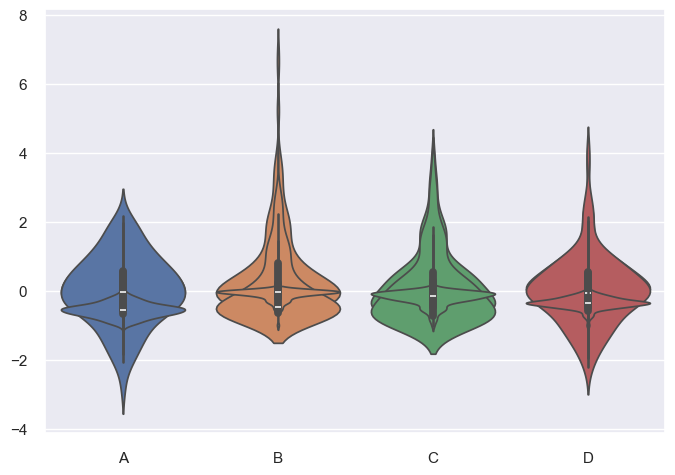

In [55]:
sns.violinplot(robust_data)
sns.violinplot(standardise_data)
sns.violinplot(min_max_data)

Après avoir étudié séparément chacune des variables de notre tableau de données, on peut s’intéresser aux relations entre elles, notamment en paire à paire. On distingue entre différentes interactions:

- Deux variables quantitatives, comme pour le couple (température, pollution).
- Une variable quantitative et une qualitative, comme l’exemple JO.
- Deux variables qualitatives, comme pour le port de la ceinture.

## Deux variables quantitatives <a id="part2sec2"></a>

Pour les couples de variables quantitatives, la représentation visuelle la plus simple est de tracer un nuage de point. Pour chaque couple du jeu de donnée que nous venons de créer, on trace un nuage de point en utilisant la fonction ``sns.pairplot``. 

<b style="color:red"> À vous de jouer :</b> Commentez ce que l'on obtient pour chaque couple. 

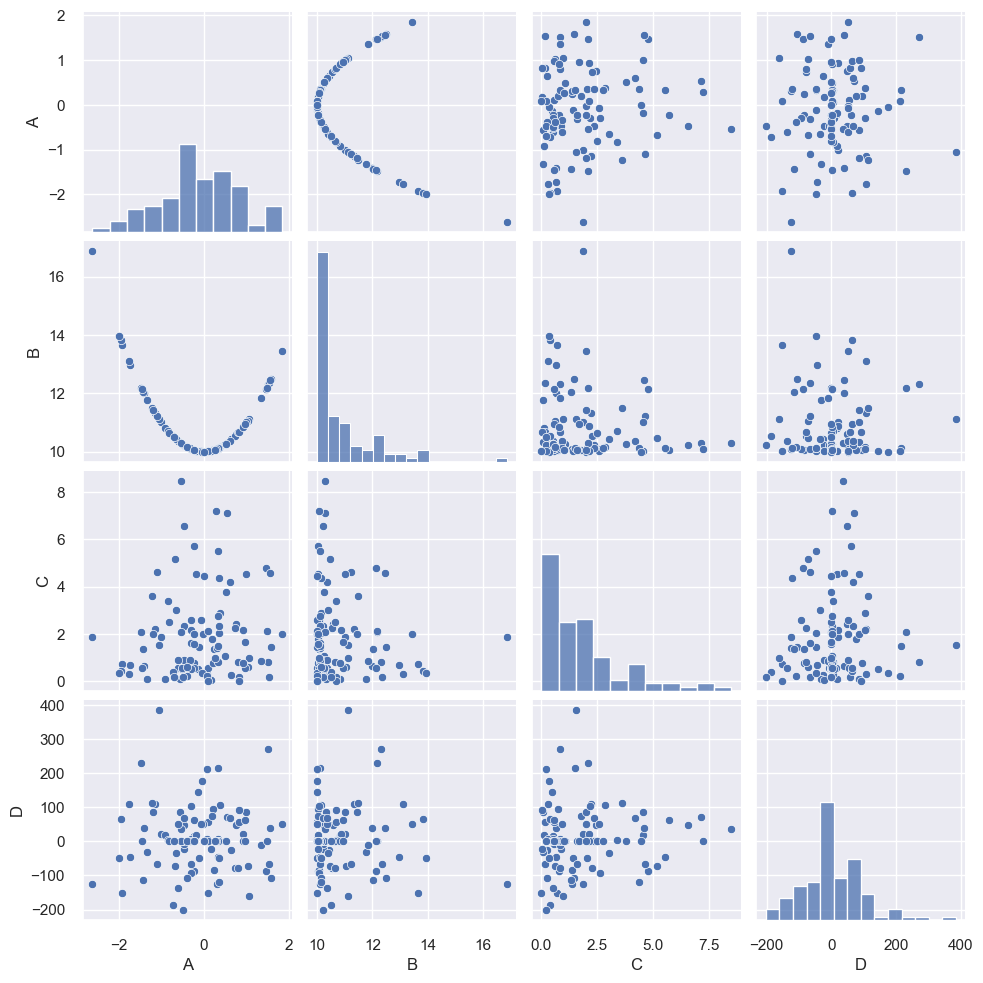

In [56]:
sns.pairplot(data)

Il semble y avoir une relation quadratique entre A et B. De l'indépendance entre A et C, A et D
Il semble y avoir une relation linéire entre B et C et pas de relation entre B et D
Indépedance C et D ?

## Une variable quantitative et une qualitative <a id="part2sec3"></a>

On peut visualiser l’influence d'une variable qualitative sur la variable quantitative en traçant un box plot pour chaque modalité de la variable qualitative. Reprenons l'exemple de base de données du cours sur la répartition des médailles par continent et type de médaille aux JO de Londres en 2012. 

In [57]:
# Données basées sur les résultats des JO de Londres 2012
data = {
    'Pays': ['États-Unis', 'Chine', 'Royaume-Uni', 'Russie', 'Corée du Sud', 'Allemagne', 
             'France', 'Italie', 'Hongrie', 'Australie', 'Japon', 'Kazakhstan', 
             'Pays-Bas', 'Ukraine', 'Nouvelle-Zélande', 'Cuba', 'Iran', 'Jamaïque', 
             'République tchèque', 'Corée du Nord', 'Espagne', 'Brésil', 'Biélorussie', 
             'Afrique du Sud', 'Éthiopie', 'Croatie', 'Roumanie', 'Kenya', 
             'Danemark', 'Azerbaïdjan'],
    'Continent': ['Amérique', 'Asie', 'Europe', 'Europe', 'Asie', 'Europe', 
                  'Europe', 'Europe', 'Europe', 'Océanie', 'Asie', 'Asie', 
                  'Europe', 'Europe', 'Océanie', 'Amérique', 'Asie', 'Amérique', 
                  'Europe', 'Asie', 'Europe', 'Amérique', 'Europe', 
                  'Afrique', 'Afrique', 'Europe', 'Europe', 'Afrique', 
                  'Europe', 'Asie'],
    'Médailles d Or': [46, 38, 29, 24, 13, 11, 
                        11, 8, 8, 7, 7, 7, 
                        6, 6, 6, 5, 4, 4, 
                        4, 4, 3, 3, 3, 
                        3, 3, 3, 2, 2, 
                        2, 2],
    'Médailles d Argent': [28, 27, 17, 26, 8, 19, 
                            11, 9, 4, 16, 14, 1, 
                            6, 5, 2, 3, 5, 4, 
                            3, 0, 10, 5, 5, 
                            2, 1, 5, 5, 4, 
                            4, 2],
    'Médailles de Bronze': [29, 23, 19, 32, 7, 14, 
                            12, 11, 5, 12, 17, 5, 
                            8, 9, 5, 6, 3, 4, 
                            3, 2, 4, 9, 5, 
                            1, 3, 2, 4, 5, 
                            3, 6],
    'Total Médailles': [103, 88, 65, 82, 28, 44, 
                        34, 28, 17, 35, 38, 13, 
                        20, 20, 13, 14, 12, 12, 
                        10, 6, 17, 17, 13, 
                        6, 7, 10, 11, 11, 
                        9, 10]
}

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame(data)


<b style="color:red"> À vous de jouer :</b> En utilisant ces données, regroupez les performances des pays par continents. Tracez également un box plot qui permet d'observer répartition des médailles par continent et type de médaille.  

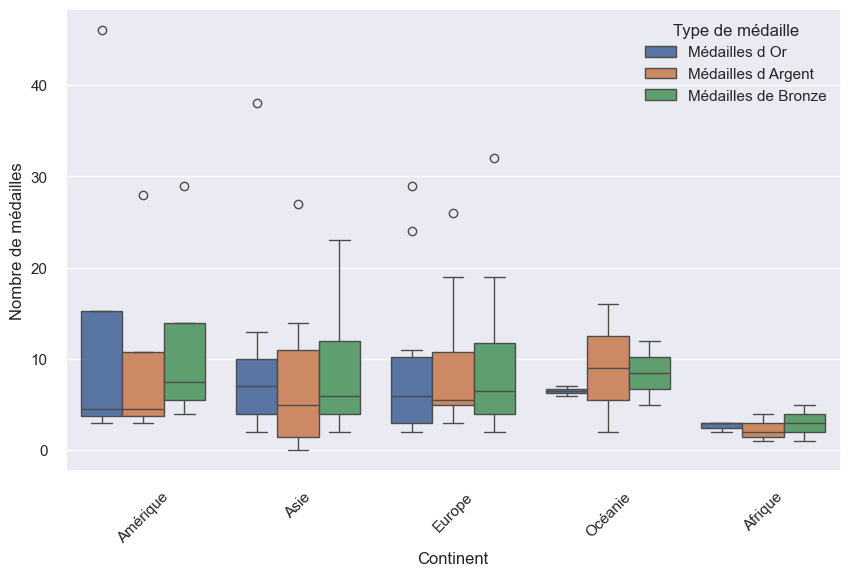

In [63]:
#Réponse
data_continent = df.groupby('Continent')[["Médailles d Or", "Médailles d Argent", "Médailles de Bronze", "Total Médailles"]].sum()
data_continent.head()

df_melted = df.melt(id_vars=["Continent"], 
                    value_vars=["Médailles d Or", "Médailles d Argent", "Médailles de Bronze"],
                    var_name="Type de médaille", value_name="Nombre de médailles")

# Tracé du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Continent", y="Nombre de médailles", hue="Type de médaille", data=df_melted)
plt.xticks(rotation=45)
plt.show()

## Deux variables qualitatives<a id="part2sec4"></a>

Pour examiner la relation entre eux ou plusieurs variables catégorielles, on utilise souvent un tableau de contingence (ou table de contingence). Il présente les fréquences ou les effectifs des différentes combinaisons de catégories. 

Rappelons donc que pour construire un tableau de contingence étape par étape, il faut:

- Pour chaque combinaison possible de catégories entre les deux variables, compter combien de fois cette combinaison apparaît dans les données.

- Construire le squelette du tableau où les catégories d’une variable sont placées en lignes et les catégories de l’autre variable en colonnes.

- Remplir le tableau avec dans chaque cellule du nombre d’occurrences pour une combinaison de catégories correspondante.

<b style="color:red"> À vous de jouer :</b> En utilisant les étapes suivantes et la base de données ci-dessous, construire un tableau de contingence permettant de confronter le résultat d'un accident de voiture en termes de gravité des blessures par rapport au fait que le passager porte ou non une ceinture de sécurité. 

In [64]:
# Exemple de données
data = {
    'Gravité de la blessure': ['Léger', 'Léger', 'Grave', 'Léger', 'Léger', 'Fatal', 'Grave', 'Léger', 'Léger', 'Grave', 
                               'Léger', 'Fatal', 'Léger', 'Grave', 'Léger', 'Fatal', 'Léger', 'Grave', 'Léger', 'Léger'],
    'Port de la ceinture': ['Oui', 'Oui', 'Non', 'Non', 'Oui', 'Non', 'Oui', 'Oui', 'Non', 'Non', 
                            'Oui', 'Non', 'Oui', 'Oui', 'Non', 'Non', 'Oui', 'Non', 'Oui', 'Oui']
}

# Créer un DataFrame
df = pd.DataFrame(data)

In [67]:
#Réponse
tableau_contingence = pd.crosstab(df["Gravité de la blessure"], df["Port de la ceinture"])

# Affichage du tableau de contingence
import ace_tools as tools
tools.display_dataframe_to_user(name="Tableau de contingence", dataframe=tableau_contingence)

ModuleNotFoundError: No module named 'ace_tools'

## Quelques exercices <a id="part3"></a>

Si vous avez déjà répondu à toutes les mises en pratique précédentes, voici quelques exercices supplémentaires. 

###  Exezcice 1 : Jeu de données **ronflements** <a id="part3sec1"></a>

Considérons le jeu de données **snore.txt**. 

1. Importez le jeu de données sous forme de  DataFrame, par exemple à l’aide de l’instruction ``pd.read_csv`` (Attention au séparateurs!). Pour bien utiliser la fonction il est conseillé d'ouvrir au préalable le fichier dans un editeur de text
2. Représentez la variable **age** sous forme d'histogramme.
3. Ajoutez un titre au graphique précédent
4. La représentez également à l'aide d'un boxplot. 
5. Représentez côte à côte l'histogramme et le boxplot précédents. 
6. Représentez la variable **sexe** grâce à un diagramme en barres. 
7. Représentez la variable **alcool** (transformée en variable qualitative via la fonction  **as.factor**). 



Text(0.5, 1.0, 'Histogralle')

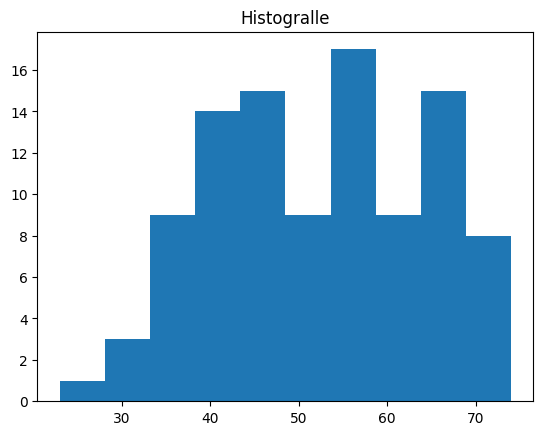

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('snore.txt', sep="	")
age = df['age']
plt.hist(age)
plt.title("Histogramme age ")


### Exercice 2 : Jeu de données **cathedral** <a id="part3sec2"></a>

Prenons à présent le jeu de données **cathedral.txt**.

1. Importez le jeu de données sous forme de  DataFrame, par exemple à l’aide de l’instruction ``pd.read_csv``
2. Représentez le nuage des points hauteur et longeur. Ajoutez un titre aux axes, jouer avec la couleur, la taille et la forme de points pour faire plusieurs représentations. 
3. Représentez sur le même graphique le nuage des points de la hauteur et longueur des cathédrales avec une couleur et une forme par style de cathedrale. 
4. Tracez l'histogramme de la variable hauteur de cathédrale. Modifier le nombre de sous-intervalles utilisé pour construire l'histogramme. Testez des différentes tailles de partition. D'après vous, quel est le nombre optimal de sous-intervalles ?
5. Même question pour l'histogramme de la variable longueur.
6. Superposez à l'histogramme de la longueur de cathédrale la densité d'une loi normale. Au vu du graphique, semble-t-il envisageable de modéliser la longueur de cathédrale par une loi normale ?

### Exercice 3 : Jeu de données **tps** <a id="part3sec3"></a>

Un serveur a enregistré des informations sur chaque pourboire qu’il a reçu sur une période de quelques mois en travaillant dans un restaurant. Les données collectées sont disponibles dans le fichier **tps.csv**. 

1. Importez le jeu de données sous forme de  DataFrame à l’aide de l’instruction ``pandas.read_csv``
2. Vérifiez qu’il n’y a pas de valeurs manquantes dans le DataFrame.
3. Quel est le nombre de variables et le nombre d’observations (dimension du DataFrame) ?.
4. Donnez le type de chaque variable.
5. Décrivez toutes les variables quantitatives de ce jeu de données sous forme de tableau (effectif, min, max, moyenne, médiane,. . .).
6. Quel est le montant maximal du pourboire donné au serveur ?
7. Construisez le tableau statistique de la variable **Smoker** qui contient en colonnes les : effectifs (ni) et les fréquences (fi).
8. Entre les fumeurs et les non–fumeur, qui donnent le plus de pourboires (en termes de nombre pas de montant laissé) ?
9. Quel est le nombre des pourboires donnés par les femmes non fumeuses ?
10. Tracez un histogramme pour la variable **total_bill**.
11. Pensez-vous que cette variable suit une loi normale ? Justifiez votre réponse.
12. Le graphique précédent est-il adapté pour représenter la variable time ? Justifiez votre réponse.
13. Donnez une représentation graphique, de votre choix, de cette dernière variable.
14. Tracez le pie chart de la variable **sex**.
15. Tracez et commentez la boite à moustache de la variable **tip**.

